In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

<h1>TRAINING DATASET </h1>

In [39]:
# Load the dataset
df_train= pd.read_csv(r"C:\Users\trabo\python\DS52\Airbnb Project\analysisData.csv\analysisData.csv")

<h3>Dropping unnecessary columns</h3>

In [40]:
df_train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [41]:
# Drop the id column
df_train= df_train.drop('id', axis=1)

# Drop unnecessary columns
df_train=df_train.drop(columns=['listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url', 'medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_acceptance_rate','host_thumbnail_url','host_picture_url', 'square_feet','weekly_price','monthly_price','license','jurisdiction_names', 'has_availability', 'host_has_profile_pic', 'requires_license', 'neighbourhood', 'require_guest_profile_picture', 'country','require_guest_phone_verification', 'smart_location', 'calendar_last_scraped', 'first_review', 'last_review', 'host_neighbourhood', 'calculated_host_listings_count', 'host_listings_count', 'name', 'house_rules', 'interaction', 'notes', 'description', 'neighborhood_overview', 'space', 'access', 'host_verifications', 'calendar_updated', 'host_about', 'host_response_rate','host_acceptance_rate','host_location', 'host_response_time', 'street', 'summary', 'transit' ])

In [42]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_is_superhost             29142 non-null  object 
 1   host_total_listings_count     29142 non-null  int64  
 2   host_identity_verified        29142 non-null  object 
 3   neighbourhood_cleansed        29142 non-null  object 
 4   neighbourhood_group_cleansed  29142 non-null  object 
 5   city                          29106 non-null  object 
 6   state                         29141 non-null  object 
 7   zipcode                       28791 non-null  object 
 8   market                        29058 non-null  object 
 9   country_code                  29142 non-null  object 
 10  latitude                      29142 non-null  float64
 11  longitude                     29142 non-null  float64
 12  is_location_exact             29142 non-null  object 
 13  p

(29142, 44)

<h3>Checking for duplicates </h3>

In [43]:
print("Number of duplicates in dataset:", df_train.duplicated().sum())


Number of duplicates in dataset: 0


<h3> Correcting incorrect values </h3>

In [44]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
num_cols = [col for col in df_train.columns if df_train[col].dtype != 'object']

In [45]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df_train[col].nunique()} values : {df_train[col].unique()} \n")

host_is_superhost has 2 values : ['f' 't'] 

host_identity_verified has 2 values : ['f' 't'] 

neighbourhood_cleansed has 212 values : ['East Elmhurst' 'East Harlem' 'Williamsburg' 'Washington Heights'
 'Upper East Side' 'Crown Heights' 'Upper West Side' 'Harlem' 'Fordham'
 'SoHo' 'Greenpoint' 'Wakefield' 'Gowanus' 'Nolita' 'Bushwick'
 'Bedford-Stuyvesant' 'Long Island City' "Hell's Kitchen" 'Midtown'
 'Sunset Park' 'Flatbush' 'Chelsea' 'Carroll Gardens' 'Park Slope'
 'Jackson Heights' 'Murray Hill' 'West Village' 'East Village' 'Arrochar'
 'Unionport' 'Prospect-Lefferts Gardens' 'Clinton Hill' 'Gramercy'
 'Kips Bay' 'Concourse' 'Sheepshead Bay' 'Flushing' 'Lower East Side'
 'Hunts Point' 'Chinatown' 'Ridgewood' 'Astoria' 'Elmhurst'
 'Greenwich Village' 'Sunnyside' 'Bensonhurst' 'Flatiron District'
 'Cypress Hills' 'Financial District' 'Prospect Heights' 'NoHo'
 'Tompkinsville' 'Ditmars Steinway' 'Fort Greene' 'Forest Hills'
 'Two Bridges' 'East Flatbush' 'South Slope' 'Theater Distric

In [46]:
from numpy import nan 

# Improving the data for state 
df_train['state'].replace(to_replace = {'New York':'NY','ny':'NY'},inplace=True)

# Correcting wrong values for postcode 
df_train['zipcode'].replace(to_replace = {'10003-8623':'10003','11249\r\n11249':'11249', '11413-3220': '11413', '1m': nan, '11103-3233': '11103'  },inplace=True)

#Change the type of zipcode to numeric
df_train['zipcode'] = pd.to_numeric(df_train['zipcode'], errors='coerce')

# Cleaning the city data to avoid repeated categories 
df_train['city'] = df_train['city'].str.strip()
df_train['city'] = df_train['city'].str.lower()

# Translating the city columns which is not in english 
df_train['city'].replace(to_replace = {'Бруклин':'brooklyn','纽约市':'new york','布鲁克林':'brooklyn','法拉盛':'flushing','纽约':'new york'},inplace=True)


In [47]:
# Check if the new changes has been applied

for col in cat_cols:
    print(f"{col} has {df_train[col].nunique()} values : {df_train[col].unique()} \n")

host_is_superhost has 2 values : ['f' 't'] 

host_identity_verified has 2 values : ['f' 't'] 

neighbourhood_cleansed has 212 values : ['East Elmhurst' 'East Harlem' 'Williamsburg' 'Washington Heights'
 'Upper East Side' 'Crown Heights' 'Upper West Side' 'Harlem' 'Fordham'
 'SoHo' 'Greenpoint' 'Wakefield' 'Gowanus' 'Nolita' 'Bushwick'
 'Bedford-Stuyvesant' 'Long Island City' "Hell's Kitchen" 'Midtown'
 'Sunset Park' 'Flatbush' 'Chelsea' 'Carroll Gardens' 'Park Slope'
 'Jackson Heights' 'Murray Hill' 'West Village' 'East Village' 'Arrochar'
 'Unionport' 'Prospect-Lefferts Gardens' 'Clinton Hill' 'Gramercy'
 'Kips Bay' 'Concourse' 'Sheepshead Bay' 'Flushing' 'Lower East Side'
 'Hunts Point' 'Chinatown' 'Ridgewood' 'Astoria' 'Elmhurst'
 'Greenwich Village' 'Sunnyside' 'Bensonhurst' 'Flatiron District'
 'Cypress Hills' 'Financial District' 'Prospect Heights' 'NoHo'
 'Tompkinsville' 'Ditmars Steinway' 'Fort Greene' 'Forest Hills'
 'Two Bridges' 'East Flatbush' 'South Slope' 'Theater Distric

In [48]:
# Further cleansing of city beacsue there are too many duplicates
df_train['city'].replace(to_replace = {'east elmhurst (queens)':'east elmhurst','newyork':'new york','brooklyn, ny':'brooklyn','ny':'new york','nueva york':'new york','бруклин': 'brooklyn','brookyln':'brooklyn','nyc': 'new york','staten island new york':'staten island','bronx, ny':'bronx','new york, new york, us':'new york','astoria new york':'astoria','brooklyn / bushwick':'brooklyn',
                                       'new york city':'new york','williamsburg bk': 'williamsburg','queens ny':'queens','elmhurst queens 11373':'elmhurst','8425 elmhurst avenue':'elmhurst','bklyn ny':'brooklyn','long island':'long island city','bronx, new york, us':'bronx','astoria/lic':'astoria','statenisland': 'staten island','bronx ny':'bronx','brooklyn,  ny':'brooklyn','flushing /kew gardens hills': 'flushing',
                                       'astoria, new york':'astoria','brooklyn city':'brooklyn','bronxville': 'bronx','lic':'long island city', 'l.i.c':'long island city', 'longislandcity':'long island city', 'astoria, queens':'astoria','brooklyn,  ny 11221':'brooklyn', 'brooklyn, new york': 'brooklyn','ridgwood': 'ridgewood','sunnyside queens':'sunnyside','astoria,queens':'astoria','elmhurst queens':'elmhurst','astoria,new york':'astoria',
                                       'williamsburg brooklyn': 'williamsburg','williamsburg, brooklyn': 'williamsburg','bushwick, brooklyn':'bushwick','manhattan, new york':'manhattan','bushwick/ridgewood':'bushwick','brookyn':'brooklyn','bk':'brooklyn','new york, us':'new york','long island city, queens':'long island city','brooklyn, bedstuy':'bedstuy','st. albans': 'saint albans','brooklyn\r\nbrooklyn':'brooklyn','brooklyn ny':'brooklyn',
                                       'manhattan ny':'manhattan','city island':'long island city','astoria - new york':'astoria'},inplace=True)

In [49]:
# Check if the new changes has been applied

for col in cat_cols:
    print(f"{col} has {df_train[col].nunique()} values : {df_train[col].unique()} \n")

host_is_superhost has 2 values : ['f' 't'] 

host_identity_verified has 2 values : ['f' 't'] 

neighbourhood_cleansed has 212 values : ['East Elmhurst' 'East Harlem' 'Williamsburg' 'Washington Heights'
 'Upper East Side' 'Crown Heights' 'Upper West Side' 'Harlem' 'Fordham'
 'SoHo' 'Greenpoint' 'Wakefield' 'Gowanus' 'Nolita' 'Bushwick'
 'Bedford-Stuyvesant' 'Long Island City' "Hell's Kitchen" 'Midtown'
 'Sunset Park' 'Flatbush' 'Chelsea' 'Carroll Gardens' 'Park Slope'
 'Jackson Heights' 'Murray Hill' 'West Village' 'East Village' 'Arrochar'
 'Unionport' 'Prospect-Lefferts Gardens' 'Clinton Hill' 'Gramercy'
 'Kips Bay' 'Concourse' 'Sheepshead Bay' 'Flushing' 'Lower East Side'
 'Hunts Point' 'Chinatown' 'Ridgewood' 'Astoria' 'Elmhurst'
 'Greenwich Village' 'Sunnyside' 'Bensonhurst' 'Flatiron District'
 'Cypress Hills' 'Financial District' 'Prospect Heights' 'NoHo'
 'Tompkinsville' 'Ditmars Steinway' 'Fort Greene' 'Forest Hills'
 'Two Bridges' 'East Flatbush' 'South Slope' 'Theater Distric

In [50]:
# Update the categorical and numerical columns since we changed the type

cat_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
num_cols = [col for col in df_train.columns if df_train[col].dtype != 'object']

<h3> Checking distribution</h3>

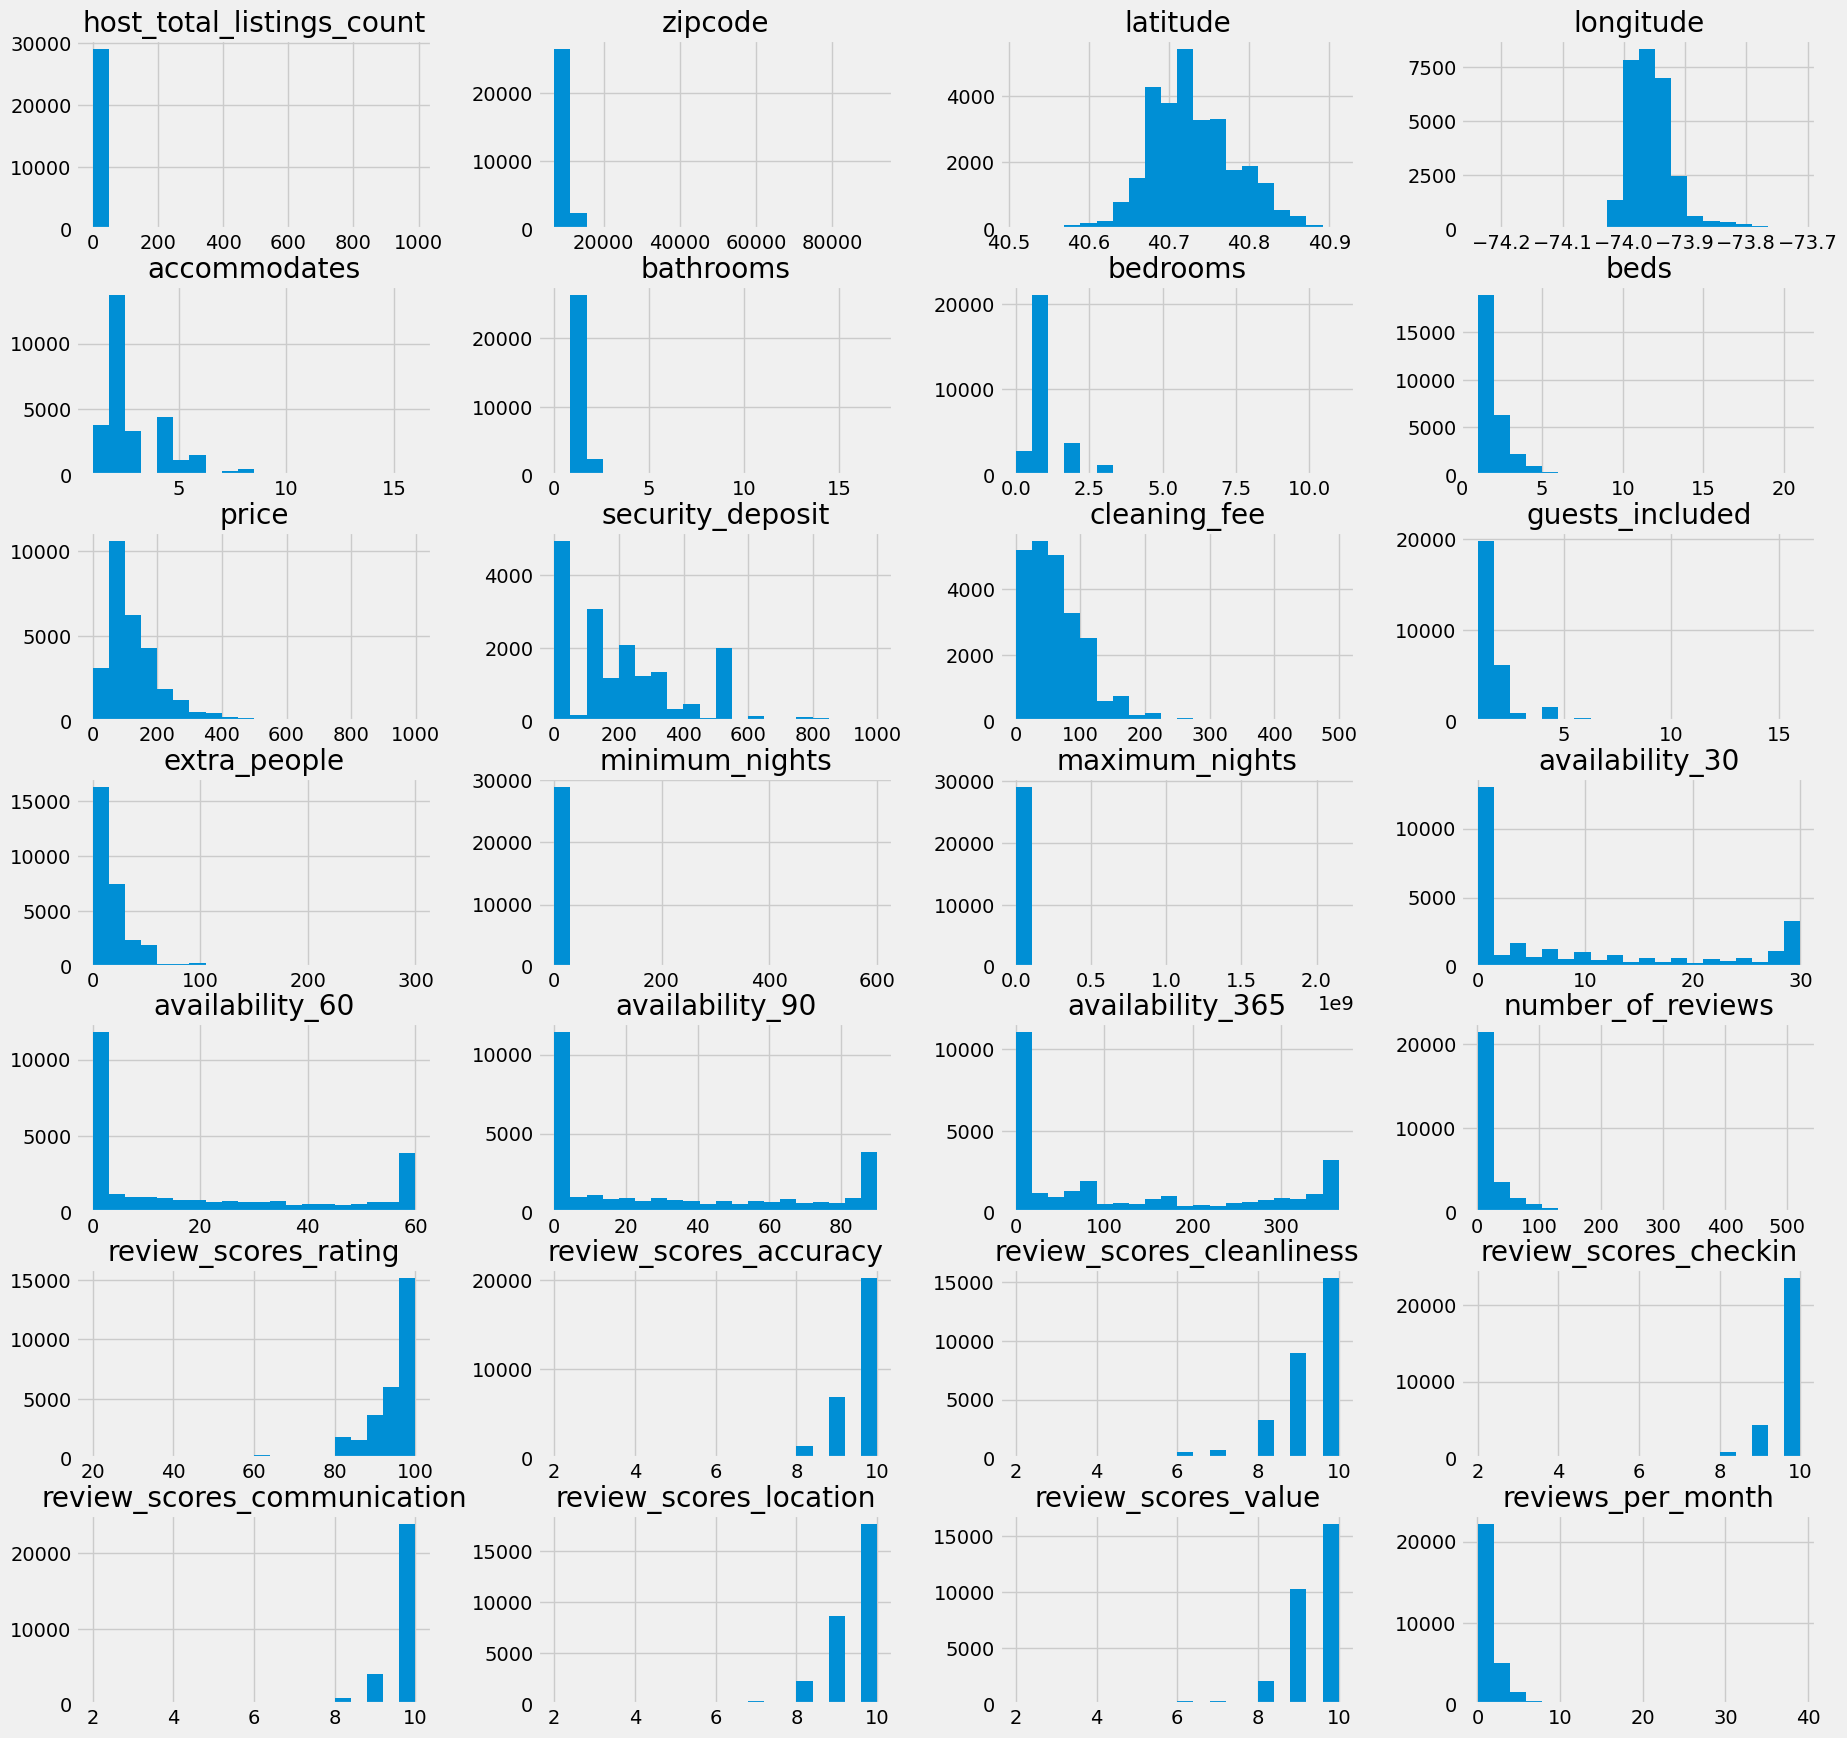

In [51]:
# checking numerical features distribution

df_train.hist(layout=(20, 4), figsize=(20, 60), bins=20)
plt.show()

<Axes: >

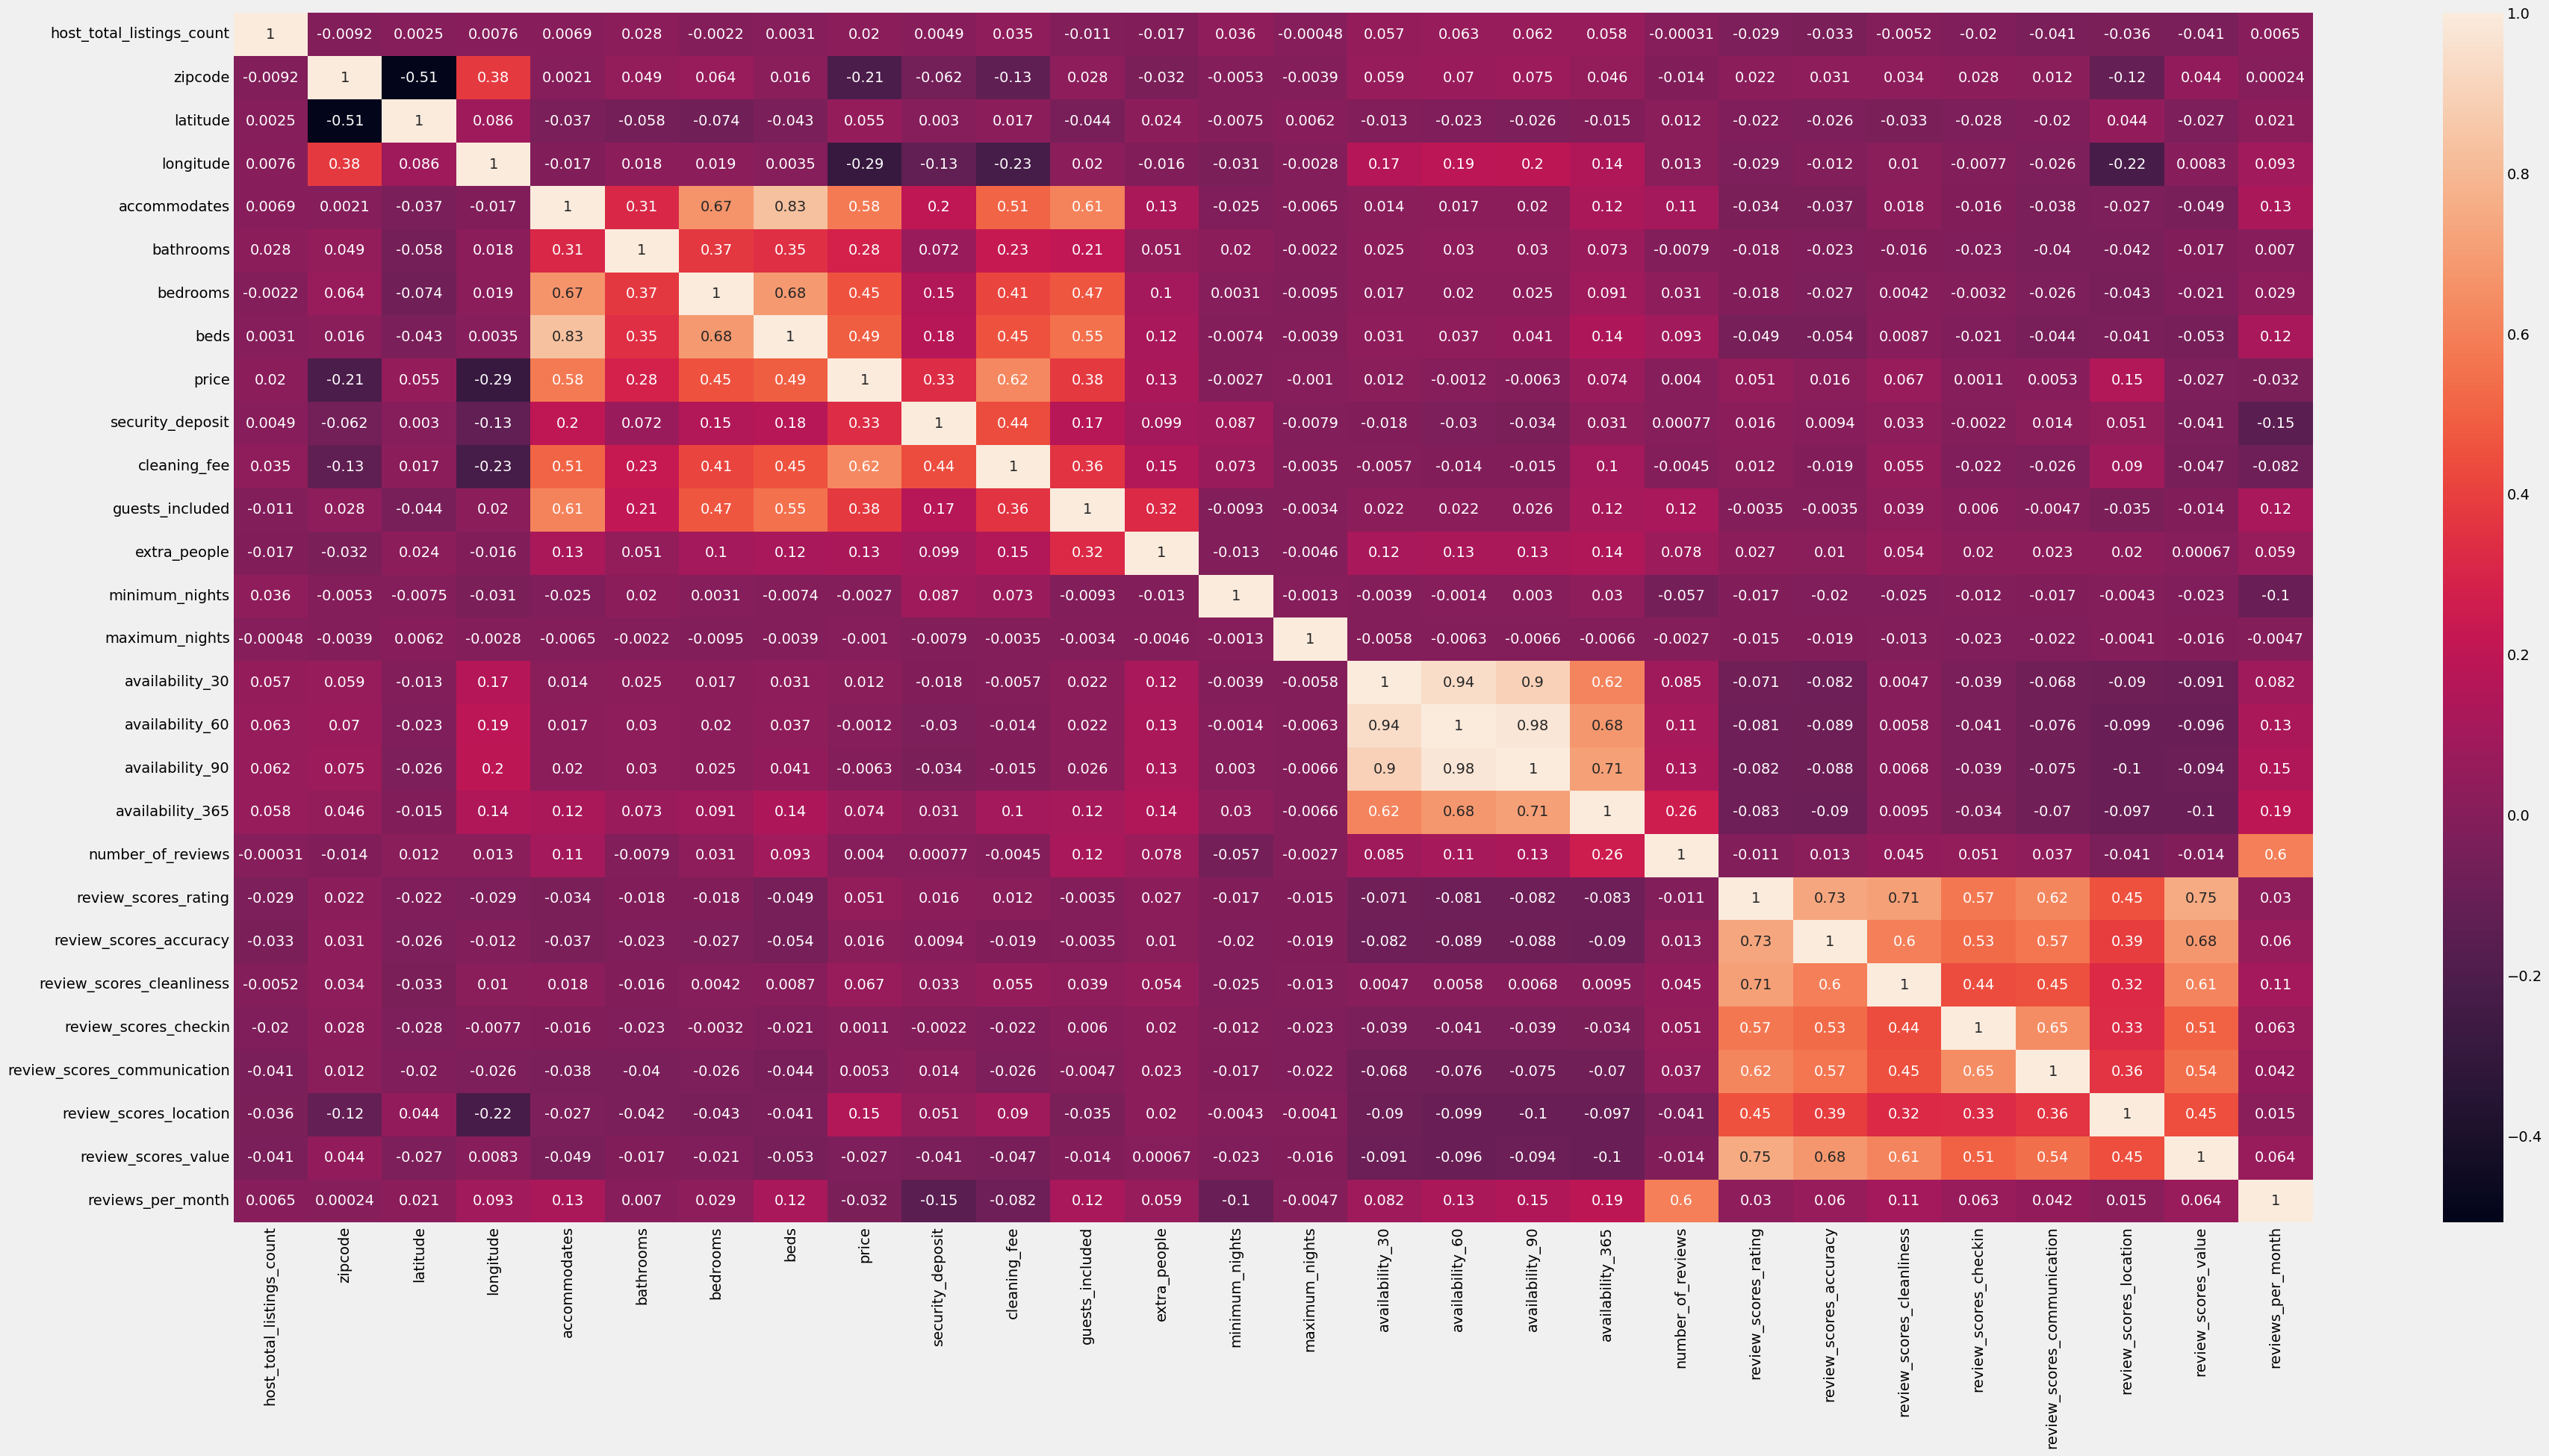

In [52]:
plt.figure(figsize = [40, 20])
sns.heatmap(df_train.corr(numeric_only=True), annot = True)

In [53]:
# imp_columns = ['accommodates','bathrooms','bedrooms','beds','security_deposit','cleaning_fee','extra_people']

<h3>Handling missing values</h3>

In [54]:
# Check the number of missing data for each columns 
df_train.isna().sum().sort_values(ascending = False)

security_deposit                11827
cleaning_fee                     5702
zipcode                           352
market                             84
city                               36
beds                               17
state                               1
review_scores_rating                0
maximum_nights                      0
availability_30                     0
availability_60                     0
availability_90                     0
availability_365                    0
number_of_reviews                   0
review_scores_checkin               0
review_scores_accuracy              0
review_scores_cleanliness           0
extra_people                        0
review_scores_communication         0
review_scores_location              0
review_scores_value                 0
instant_bookable                    0
is_business_travel_ready            0
cancellation_policy                 0
minimum_nights                      0
host_is_superhost                   0
guests_inclu

For numerical columns

In [55]:
# Impute missing values for each numerical column

# Identify columns with many missing values
columns_with_many_missing = [col for col in num_cols if df_train[col].isnull().sum() > 100]

# Identify columns with less than or equal to 100 missing values within numerical columns
columns_with_few_missing = [col for col in num_cols if df_train[col].isnull().sum() <= 100]

# Random sampling for columns with more than 100 missing values
for column in columns_with_many_missing:
    if df_train[column].isnull().sum() > 100:
        # Randomly sample from non-missing values
        non_missing_values = df_train[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df_train[column].isnull().sum(), replace=True)
        df_train.loc[df_train[column].isnull(), column] = random_samples

# Median imputation for columns with less than 100 missing values
for column in columns_with_few_missing:
    if df_train[column].isnull().sum() > 0:
        median_value = df_train[column].median()
        df_train[column].fillna(median_value, inplace=True)

In [56]:
# Double check to verify there is no more missing data 
df_train[num_cols].isnull().sum()

host_total_listings_count      0
zipcode                        0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

For categorical columns

In [57]:
# Check the number of missing data for each columns 
df_train[cat_cols].isnull().sum()

host_is_superhost                0
host_identity_verified           0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
city                            36
state                            1
market                          84
country_code                     0
is_location_exact                0
property_type                    0
room_type                        0
bed_type                         0
amenities                        0
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy              0
dtype: int64

In [58]:
# Impute missing values with the mode for each categorical column
for col in cat_cols:
    df_train[col].fillna(df_train[col].value_counts().index[0], inplace = True)

In [59]:
# Double check to verify there is no more missing data 
df_train[cat_cols].isnull().sum()

host_is_superhost               0
host_identity_verified          0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
city                            0
state                           0
market                          0
country_code                    0
is_location_exact               0
property_type                   0
room_type                       0
bed_type                        0
amenities                       0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
dtype: int64

<h3> Encoding Categorical Variables </h3>

Using label encoder 

In [60]:
le = LabelEncoder()
column_le = [ 'host_is_superhost','host_identity_verified','is_location_exact','country_code','instant_bookable','is_business_travel_ready','neighbourhood_cleansed','city','market','property_type','state' ]
for col in column_le:
    df_train[col] = le.fit_transform(df_train[col])

In [61]:
df_train.shape

(29142, 44)

Using one hot encoding 

In [62]:
encoder = OneHotEncoder()
cols_to_encode = [col for col in cat_cols if col not in column_le ]
cols_to_encode = [col for col in cols_to_encode if col != 'cancellation_policy']
cols_to_encode = [col for col in cols_to_encode if col != 'amenities']

for col in cols_to_encode:
    print(f"{col} has {df_train[col].nunique()} categories\n")

neighbourhood_group_cleansed has 5 categories

room_type has 3 categories

bed_type has 5 categories



In [63]:
one_hot_encoded = encoder.fit_transform(df_train[cols_to_encode])

# Convert the sparse matrix to an array
one_hot_encoded_array = one_hot_encoded.toarray()

# Create DataFrame for one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_train = pd.concat([df_train, one_hot_encoded_df], axis=1)

# Drop the original categorical columns
df_train.drop(cols_to_encode, axis=1, inplace=True)

In [64]:
df_train.shape

(29142, 54)

Encode text column 

In [65]:
list_amenities = []
rows = df_train['amenities']

for row in rows:
    # Remove curly braces, quotation marks, and split the string into individual amenities
    amenities = row.replace('{', '').replace('}', '').replace('"', '').split(',')
    for amenity in amenities:
        # Check if amenity is not empty and not already in the list_amenities
        if amenity.strip() != '' and amenity.strip() not in list_amenities:
            list_amenities.append(amenity.strip())

print(len(list_amenities))

for amenity in list_amenities:
    print(amenity)

119
Wifi
Kitchen
Heating
Smoke detector
Carbon monoxide detector
Essentials
Hangers
Laptop friendly workspace
Private living room
TV
Cable TV
Internet
Air conditioning
Elevator
Buzzer/wireless intercom
Washer
Dryer
First aid kit
Fire extinguisher
Shampoo
24-hour check-in
Hair dryer
Iron
translation missing: en.hosting_amenity_49
translation missing: en.hosting_amenity_50
Smoking allowed
Safety card
Lock on bedroom door
Indoor fireplace
Bathtub
Room-darkening shades
Refrigerator
Dishes and silverware
Cooking basics
Oven
Stove
Single level home
Luggage dropoff allowed
Long term stays allowed
Step-free access
Well-lit path to entrance
Wide clearance to bed
Accessible-height toilet
Host greets you
Pets live on this property
Dog(s)
Family/kid friendly
Self check-in
Keypad
Microwave
Coffee maker
Dishwasher
Patio or balcony
Garden or backyard
Doorman
Hot water
Bed linens
Extra pillows and blankets
Ethernet connection
Other
Free street parking
Lockbox
Changing table
Children’s books and toys
B

In [66]:
# Define a function to perform one-hot encoding based on the amenities list
def one_hot_encode(row):
    # Create a binary vector for each row based on the presence or absence of amenities
    return [1 if amenity in row else 0 for amenity in list_amenities]

# Apply the function to each row in the 'amenities' column
encoded_amenities = df_train['amenities'].apply(one_hot_encode)

# Create a DataFrame from the list of encoded amenities
encoded_df = pd.DataFrame(encoded_amenities.tolist(), columns=list_amenities)

# Concatenate the original DataFrame with the encoded DataFrame
df_train= pd.concat([df_train, encoded_df], axis=1)
df_train= df_train.drop('amenities', axis=1)

In [67]:
df_train.shape

(29142, 172)

Using ordinal encoder

In [68]:
ordinalEncoder = OrdinalEncoder()

# Fit and transform the data
encoded_data_ord = ordinalEncoder.fit_transform(df_train[['cancellation_policy']])
df_train['cancellation_policy'] = encoded_data_ord

<h3> Defining x and y for training </h3>

In [69]:
ind_col = [col for col in df_train.columns if col != 'price']
dep_col = 'price'

x_train = df_train[ind_col]
y_train = df_train[dep_col]

<h3> Standardising the data </h3>

In [70]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

<H2>TEST DATASET</H2>

In [71]:
# Load the dataset
df_test= pd.read_csv(r"C:\Users\trabo\python\DS52\Airbnb Project\scoringData\scoringData.csv")

<h3>Dropping unnecessary columns</h3>

In [72]:
df_test.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [73]:
df_test=df_test.drop(columns=['id','listing_url','scrape_id','last_scraped','experiences_offered','thumbnail_url', 'medium_url','picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_acceptance_rate','host_thumbnail_url','host_picture_url', 'square_feet','weekly_price','monthly_price','license','jurisdiction_names', 'has_availability', 'host_has_profile_pic', 'requires_license', 'neighbourhood', 'require_guest_profile_picture', 'require_guest_phone_verification', 'country', 'smart_location', 'calendar_last_scraped', 'first_review', 'last_review', 'host_neighbourhood', 'calculated_host_listings_count', 'host_listings_count', 'name', 'house_rules', 'interaction', 'notes', 'description', 'neighborhood_overview', 'space', 'access', 'host_verifications', 'calendar_updated', 'host_about', 'host_response_rate','host_acceptance_rate','host_location', 'host_response_time', 'street','transit', 'summary'])

In [74]:
df_test.shape


(7286, 43)

<h3>Checking for duplicates </h3>

In [75]:
print("Number of duplicates in dataset:", df_test.duplicated().sum())


Number of duplicates in dataset: 0


<h3> Correcting incorrect values </h3>

In [76]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df_test.columns if df_test[col].dtype == 'object']
num_cols = [col for col in df_test.columns if df_test[col].dtype != 'object']

In [77]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df_test[col].nunique()} values : {df_test[col].unique()} \n")

host_is_superhost has 2 values : ['f' 't'] 

host_identity_verified has 2 values : ['t' 'f'] 

neighbourhood_cleansed has 175 values : ["Hell's Kitchen" 'Sunset Park' 'West Village' 'East Harlem'
 'Upper West Side' 'Park Slope' 'Bedford-Stuyvesant' 'Greenpoint'
 'East Village' 'Clinton Hill' 'Williamsburg' 'Prospect-Lefferts Gardens'
 'Flatbush' 'Nolita' 'Fort Greene' 'Chelsea' 'South Slope'
 'Long Island City' 'Harlem' 'Financial District' 'Ridgewood'
 'Prospect Heights' 'Crown Heights' 'Middle Village' 'Bushwick'
 'Cobble Hill' 'SoHo' 'Lower East Side' 'Tompkinsville' 'Parkchester'
 'Upper East Side' 'Kips Bay' 'Stuyvesant Town' 'Boerum Hill'
 'Brooklyn Heights' 'Washington Heights' 'Rockaway Beach' 'Midtown'
 'Forest Hills' 'Greenwich Village' 'Astoria' 'Carroll Gardens'
 'Theater District' 'Murray Hill' 'Todt Hill' 'Concourse' 'Chinatown'
 'East Flatbush' 'Wakefield' 'Little Italy' 'Kensington' 'Bay Ridge'
 'Graniteville' 'Columbia St' 'East New York' 'Jackson Heights' 'Longwood'
 

In [78]:
# Code to correct the wrong data

from numpy import nan 

# Improving the data for state 
df_test['state'].replace(to_replace = {'ny':'NY', 'Ny':'NY'},inplace=True)

# Cleaning the city data to avoid repeated categories 
df_test['city'] = df_test['city'].str.strip()
df_test['city'] = df_test['city'].str.lower()

In [79]:
# Double check the changes 

for col in cat_cols:
    print(f"{col} has {df_test[col].nunique()} values : {df_test[col].unique()} \n")

host_is_superhost has 2 values : ['f' 't'] 

host_identity_verified has 2 values : ['t' 'f'] 

neighbourhood_cleansed has 175 values : ["Hell's Kitchen" 'Sunset Park' 'West Village' 'East Harlem'
 'Upper West Side' 'Park Slope' 'Bedford-Stuyvesant' 'Greenpoint'
 'East Village' 'Clinton Hill' 'Williamsburg' 'Prospect-Lefferts Gardens'
 'Flatbush' 'Nolita' 'Fort Greene' 'Chelsea' 'South Slope'
 'Long Island City' 'Harlem' 'Financial District' 'Ridgewood'
 'Prospect Heights' 'Crown Heights' 'Middle Village' 'Bushwick'
 'Cobble Hill' 'SoHo' 'Lower East Side' 'Tompkinsville' 'Parkchester'
 'Upper East Side' 'Kips Bay' 'Stuyvesant Town' 'Boerum Hill'
 'Brooklyn Heights' 'Washington Heights' 'Rockaway Beach' 'Midtown'
 'Forest Hills' 'Greenwich Village' 'Astoria' 'Carroll Gardens'
 'Theater District' 'Murray Hill' 'Todt Hill' 'Concourse' 'Chinatown'
 'East Flatbush' 'Wakefield' 'Little Italy' 'Kensington' 'Bay Ridge'
 'Graniteville' 'Columbia St' 'East New York' 'Jackson Heights' 'Longwood'
 

In [80]:
# Further cleansing of the data 
df_test['city'].replace(to_replace = {'manhattan, new york':'manhattan','williamsburg, brooklyn':'williamsburg','ny': 'new york', 'astoria, queens': 'astoria','williamsburg brooklyn':'williamsburg','saint albans(queens)':'saint albans','lic':'long island city','astoria, new york':'astoria','astoria queens':'astoria','brooklyn/williamsburg': 'brooklyn', 'brookyn':'brooklyn',
                                      'williamsburg,brooklyn':'brooklyn','new york , ridgewood':'ridgewood','brooklyn ny':'brooklyn', '纽约法拉盛':'flushing','new york city':'new york','brooklyn, ny':'brooklyn','11220':'new york','wadsworth terrace, manhattan, new york':'manhattan','east elmhurst (queens)': 'east elmhurst','carroll gardens,brooklyn, nyc':'brooklyn','east ny, brooklyn':'brooklyn'},inplace=True)

In [81]:
# Double check the changes 

for col in cat_cols:
    print(f"{col} has {df_test[col].nunique()} values : {df_test[col].unique()} \n")

host_is_superhost has 2 values : ['f' 't'] 

host_identity_verified has 2 values : ['t' 'f'] 

neighbourhood_cleansed has 175 values : ["Hell's Kitchen" 'Sunset Park' 'West Village' 'East Harlem'
 'Upper West Side' 'Park Slope' 'Bedford-Stuyvesant' 'Greenpoint'
 'East Village' 'Clinton Hill' 'Williamsburg' 'Prospect-Lefferts Gardens'
 'Flatbush' 'Nolita' 'Fort Greene' 'Chelsea' 'South Slope'
 'Long Island City' 'Harlem' 'Financial District' 'Ridgewood'
 'Prospect Heights' 'Crown Heights' 'Middle Village' 'Bushwick'
 'Cobble Hill' 'SoHo' 'Lower East Side' 'Tompkinsville' 'Parkchester'
 'Upper East Side' 'Kips Bay' 'Stuyvesant Town' 'Boerum Hill'
 'Brooklyn Heights' 'Washington Heights' 'Rockaway Beach' 'Midtown'
 'Forest Hills' 'Greenwich Village' 'Astoria' 'Carroll Gardens'
 'Theater District' 'Murray Hill' 'Todt Hill' 'Concourse' 'Chinatown'
 'East Flatbush' 'Wakefield' 'Little Italy' 'Kensington' 'Bay Ridge'
 'Graniteville' 'Columbia St' 'East New York' 'Jackson Heights' 'Longwood'
 

<h3>Handling missing values</h3>

In [82]:
df_test.isna().sum().sort_values(ascending = False)

security_deposit                2888
cleaning_fee                    1402
zipcode                           93
market                            18
city                               7
beds                               2
reviews_per_month                  1
state                              0
neighbourhood_group_cleansed       0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
review_scores_rating               0
review_scores_accuracy             0
review_scores_cleanliness          0
review_scores_checkin              0
review_scores_communication        0
review_scores_location             0
review_scores_value                0
instant_bookable                   0
is_business_travel_ready           0
cancellation_policy                0
maximum_nights                     0
minimum_nights                     0
extra_people                       0
a

For numerical columns

In [83]:
# Check the number of missing data for each columns 
df_test[num_cols].isnull().sum()

host_total_listings_count         0
zipcode                          93
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              2
security_deposit               2888
cleaning_fee                   1402
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
reviews_per_month                 1
dtype: int64

In [84]:
# Impute missing values for each numerical column


# Identify columns with many missing values
columns_with_many_missing = [col for col in num_cols if df_test[col].isnull().sum() > 100]

# Identify columns with less than or equal to 100 missing values within numerical columns
columns_with_few_missing = [col for col in num_cols if df_test[col].isnull().sum() <= 100]

# Random sampling for columns with more than 100 missing values
for column in columns_with_many_missing:
    if df_test[column].isnull().sum() > 100:
        # Randomly sample from non-missing values
        non_missing_values = df_test[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df_test[column].isnull().sum(), replace=True)
        df_test.loc[df_test[column].isnull(), column] = random_samples

# Median imputation for columns with less than 100 missing values
for column in columns_with_few_missing:
    if df_test[column].isnull().sum() > 0:
        median_value = df_test[column].median()
        df_test[column].fillna(median_value, inplace=True)


In [85]:
# Double check to verify there is no more missing data 
df_test[num_cols].isnull().sum()

host_total_listings_count      0
zipcode                        0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
security_deposit               0
cleaning_fee                   0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

For categorical columns

In [86]:
# Check the number of missing data for each columns 
df_test[cat_cols].isnull().sum()

host_is_superhost                0
host_identity_verified           0
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
city                             7
state                            0
market                          18
country_code                     0
is_location_exact                0
property_type                    0
room_type                        0
bed_type                         0
amenities                        0
instant_bookable                 0
is_business_travel_ready         0
cancellation_policy              0
dtype: int64

In [87]:
# Impute missing values with the mode for each categorical column
for col in cat_cols:
    df_test[col].fillna(df_test[col].value_counts().index[0], inplace = True)

In [88]:
# Double check to verify there is no more missing data 
df_test[cat_cols].isnull().sum()

host_is_superhost               0
host_identity_verified          0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
city                            0
state                           0
market                          0
country_code                    0
is_location_exact               0
property_type                   0
room_type                       0
bed_type                        0
amenities                       0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
dtype: int64

<h3> Encoding Categorical Variables </h3>

Using label encoder 

In [89]:
for col in column_le:
    df_test[col] = le.fit_transform(df_test[col])

In [90]:
df_test.shape

(7286, 43)

Using one hot encoding

In [91]:
one_hot_encoded_test = encoder.fit_transform(df_test[cols_to_encode])

# Convert the sparse matrix to an array
one_hot_encoded_test_array = one_hot_encoded_test.toarray()

# Create DataFrame for one-hot encoded data
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test_array, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenate the original DataFrame with the one-hot encoded DataFrame
df_test = pd.concat([df_test, one_hot_encoded_test_df], axis=1)

# Drop the original categorical columns
df_test.drop(cols_to_encode, axis=1, inplace=True)

In [92]:
df_test.shape

(7286, 53)

Using one hot encoding for textual column

In [93]:
# Define a function to perform one-hot encoding based on the amenities list
def one_hot_encode(row):
    # Create a binary vector for each row based on the presence or absence of amenities
    return [1 if amenity in row else 0 for amenity in list_amenities]

# Apply the function to each row in the 'amenities' column
encoded_amenities_train = df_test['amenities'].apply(one_hot_encode)

# Create a DataFrame from the list of encoded amenities
encoded_test_df = pd.DataFrame(encoded_amenities_train.tolist(), columns=list_amenities)

# Concatenate the original DataFrame with the encoded DataFrame
df_test= pd.concat([df_test, encoded_test_df], axis=1)
df_test= df_test.drop('amenities', axis=1)



Using ordinal encoder

In [94]:
ordinalEncoder = OrdinalEncoder()

# Fit and transform the data
encoded_data_ord = ordinalEncoder.fit_transform(df_test[['cancellation_policy']])
df_test['cancellation_policy'] = encoded_data_ord

In [95]:
df_test.shape

(7286, 171)

<h3> Standardising the data </h3>

In [96]:
df_test = scaler.transform(df_test)

<h1>Step 2 : Model Selection </h1>

**RANDOM FOREST**

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialise Random Forest
forest = RandomForestRegressor(random_state=42)

# Perform cross-validation
forest_scores = cross_val_score(forest, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert scores to positive and calculate RMSE
forest_rmse_scores = np.sqrt(-forest_scores)

# Print RMSE scores
print("Cross-Validation RMSE scores:", forest_rmse_scores)
print("Mean RMSE:", forest_rmse_scores.mean())

Cross-Validation RMSE scores: [58.3784633  56.17405897 56.78962316 55.34215356 55.97320631]
Mean RMSE: 56.53150106182669


**XGBOOST**

In [99]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

# Perform cross-validation
xgb_scores = cross_val_score(xgb, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert scores to positive and calculate RMSE
xgb_rmse_scores = np.sqrt(-xgb_scores)

# Print RMSE scores
print("Cross-Validation RMSE scores:", xgb_rmse_scores)
print("Mean RMSE:", xgb_rmse_scores.mean())

Cross-Validation RMSE scores: [57.52242269 56.14473991 56.75858294 53.30952046 55.52858251]
Mean RMSE: 55.85276970116981


**LASSO REGRESSOR**

In [100]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 

# Perform cross-validation
lasso_scores = cross_val_score(lasso, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert scores to positive and calculate RMSE
lasso_rmse_scores = np.sqrt(-lasso_scores)

# Print RMSE scores
print("Cross-Validation RMSE scores:", lasso_rmse_scores)
print("Mean RMSE:", lasso_rmse_scores.mean())

Cross-Validation RMSE scores: [66.05963515 64.52596201 64.55228237 62.60848263 64.82681598]
Mean RMSE: 64.51463562836291


**GRADIENT BOOSTING REGRESSOR**

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

# Perform cross-validation
gb_scores = cross_val_score(gb, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert scores to positive and calculate RMSE
gb_rmse_scores = np.sqrt(-gb_scores)

# Print RMSE scores
print("Cross-Validation RMSE scores:", gb_rmse_scores)
print("Mean RMSE:", gb_rmse_scores.mean())

Cross-Validation RMSE scores: [58.82958762 55.7846074  57.13432788 55.19680876 55.86409568]
Mean RMSE: 56.56188546487679


**Support Vector Regressor (SVR)**

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Perform cross-validation
svr_scores = cross_val_score(svr, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert scores to positive and calculate RMSE
svr_rmse_scores = np.sqrt(-svr_scores)

# Print RMSE scores
print("Cross-Validation RMSE scores:", svr_rmse_scores)
print("Mean RMSE:", svr_rmse_scores.mean())

**MODEL COMPARISON**

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Lasso Regressor','Support Vector Regressor', 'Gradient Boosting Regressor','XgBoost', 'Random Forest'],
    'Mean Cross-validation score' : [lasso_rmse_scores.mean(),svr_rmse_scores.mean(),gb_rmse_scores.mean(), xgb_rmse_scores.mean(), forest_rmse_scores.mean()]
})


models.sort_values(by = 'Mean Cross-validation score', ascending = False)

In [ ]:
import plotly.express as px
px.bar(data_frame = models, x = 'Mean Cross-validation score', y = 'Model', color = 'Mean Cross-validation score', template = 'plotly_dark',
       title = 'Models Comparison')

<h1>MODEL TRAINING AND PREDICTIONS </h1>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor()

In [ ]:
# Train the model
model.fit(x_train, y_train)


In [ ]:
# Make predictions on the test set
predictions = model.predict(df_test)
predictions



In [ ]:
predictions.shape

In [ ]:
Submissions= pd.DataFrame()
sample = pd.read_csv('sample_submission.csv')
Submissions["id"] = sample["id"]
Submissions['price'] = predictions
Submissions.to_csv('submission.csv', index=False)
Submissions.head()